# M4_2_2 Pima Diabetes, Logistic Regression

Utilizando el dataset adjunto realizar los siguientes pasos:

1. Leer el dataset y transformarlo:

    - La salida binaria (0, 1) del dataset se encuentra en la última columna, la cual determina si la persona tiene diabetes o no. 
    - Obtener las matrices X y Y (Atributos y Salida)
    - Escalar el dataset utilizando la función StandardScaler
    - Agregar el Bias (columna de unos)
    - Divide tu dataset en datos de entrenamiento y datos de prueba al 30%
    
2. Progama las funciones correspondientes al gradiente descendente:
    
    - Función logística (h)
    - Función de costo (J)
    - Función del gradiente (grad)
    - Función del gradiente descendente (GD)
    
3. Ejecuta el gradiente, ajustando tus parámetros alfa e iteraciones, procurando que tu costo sea el mínimo

4. Obtener el accuracy 

5. Escribir tus conclusiones

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#1. Load dataset
data = pd.read_csv("diabetes.csv")

#YOUR CODE
datanp = np.array(data)
x = datanp[:,0:9]
y = datanp[:,-1]

print('x:', np.shape(x))
print('y:', np.shape(y))

x: (768, 9)
y: (768,)


In [3]:
#2. Prepare data: add Bias and split dataset
def Bias(X):
    #YOUR CODE 
    ones = np.ones((len(X), 1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(x)

print('x shape: ', np.shape(x))

#SPLIT DATASET
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

x shape:  (768, 10)
Split X 768 rows into train with 614 and test with 154
Split Y 768 rows into train with 614 and test with 154
xTrain shape: (614, 10) yTrain shape: (614, 1)
xTest shape: (154, 10) yTest shape: (154, 1)


In [4]:
# 3.1 Logistic function

def h(x, w):

    # your code
    wx = np.dot(x, w.T)
    hz = 1 / (1+np.exp(-wx))
    return hz


In [5]:
# 3.2 Cost function

def cost(x, y, w):

    # YOUR CODE
    m = len(y)
    c = (-1 / m) * np.sum(y * np.log(h(x, w)) + (1 - y) * np.log(1 - h(x, w)))
    return c


In [6]:
# 3.3 Gradient function

def grad(x, y, w):

    # YOUR CODE
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T, (h(x, w) - y))
    return g


In [7]:
# 3.4 Gradient Descent function

def gd(x, y, w, alpha=0.001, its=1000):
    it = 0
    costo = 0
    J = []
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)

        # Cost function
        costo = cost(x, y, w)

        # Updating w
        w = w - alpha * gradiente.T

        # Storing cost
        J.append(costo)

        it += 1

    return w, J


Initial Cost (training data): 0.6931471805599454
Cost after training (training data): 0.5626527969603907
Cost after training (testing data): 0.5320821503250257
W: [[-0.05957969  0.08829367  0.00971835 -0.02663469  0.00173793  0.00061758
  -0.00477767  0.00985086 -0.00561881  0.28338385]]


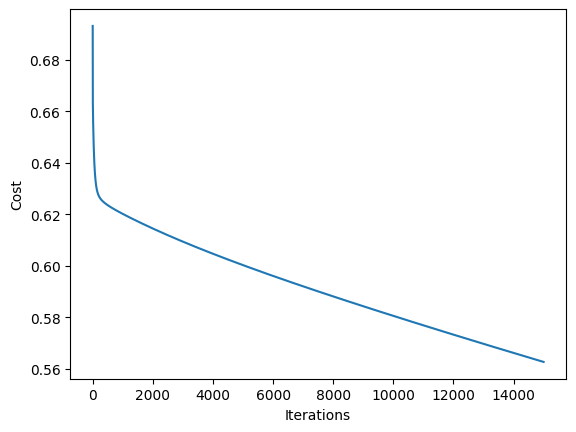

In [8]:
alpha = 0.0001
its = 15000

m, n = np.shape(x)

w = np.zeros((1, n))


print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost');

In [9]:
# 4. Accuracy

def accuracy(x, y, w):

    # YOUR CODE
    Ynew = list(map(lambda x: 1 if x > 0.5 else 0, h(x, w)))
    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1,1)
    suma = (y == Ynew).sum()
    a = suma/ len(Ynew)
    return a, suma


accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))


Training accuracy: 0.7361563517915309 452 out of 614
Testing accuracy: 0.7597402597402597 117 out of 154
